In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error




In [3]:
# carregar o dataset
df = pd.read_csv('housing.csv')
df.head(3)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
#verificar valores nulos e falta de dados
df.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
#usar get_dummies para transformar a coluna ocean_proximity em colunas binárias
df_dumies = pd.get_dummies(df['ocean_proximity'])
df_dumies.head(3)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False


In [8]:
#dropar a coluna ocean_proximity

df_drop_ocean_prox = df.drop('ocean_proximity', axis=1)
df_drop_ocean_prox

#concatenar os dataframes
df2 = pd.concat([df_drop_ocean_prox, df_dumies ], axis = 1)
df2

#mover a coluna median_house_value para o final
df2 = df2[[c for c in df2 if c not in ['median_house_value']] + ['median_house_value']]
df2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False,84700.0


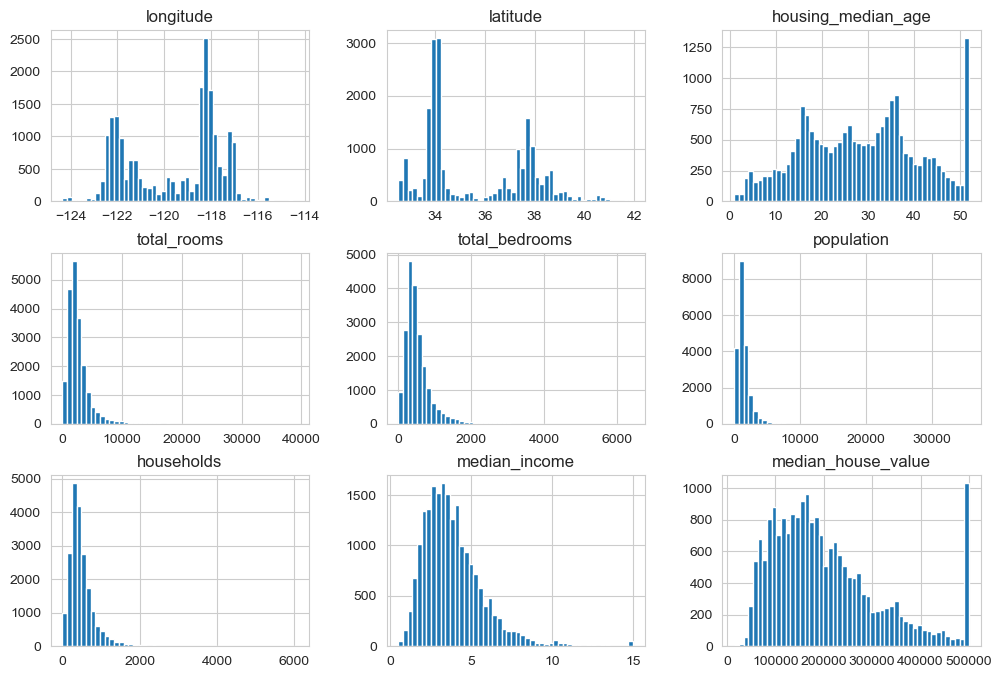

In [9]:
#verificar o grafico de dispersão de cada coluna

df2.hist(figsize = (12, 8), bins = 50)
plt.show()





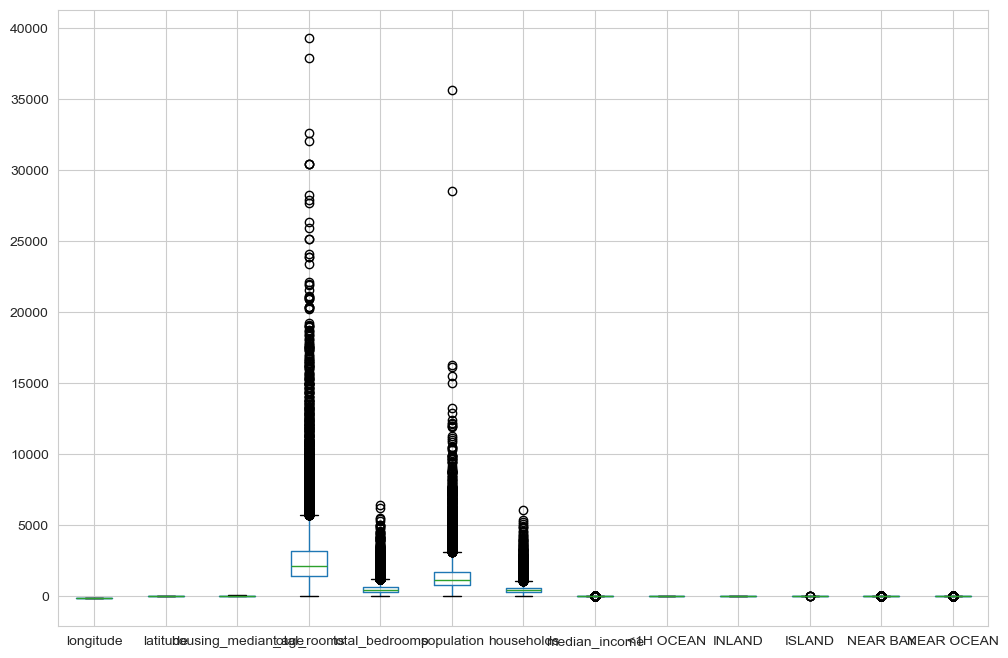

In [10]:
# gerar o boxplot das colunas 
df2.drop('median_house_value', axis = 1).boxplot(figsize = (12, 8))
plt.show()


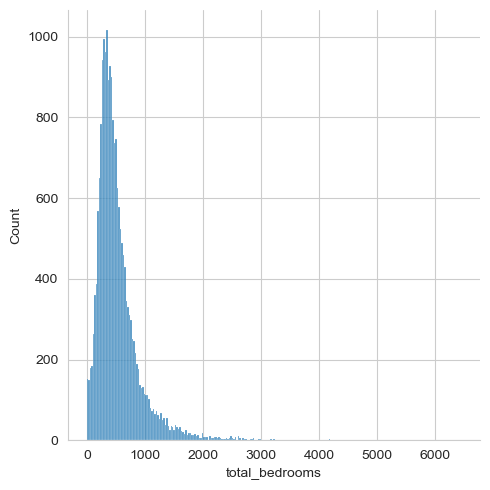

In [11]:
sns.displot(df2['total_bedrooms'])
plt.show()


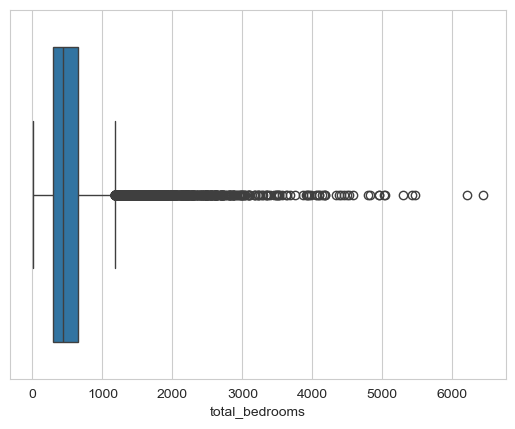

In [12]:
sns.boxplot(x=df2['total_bedrooms'])
plt.show()

In [13]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


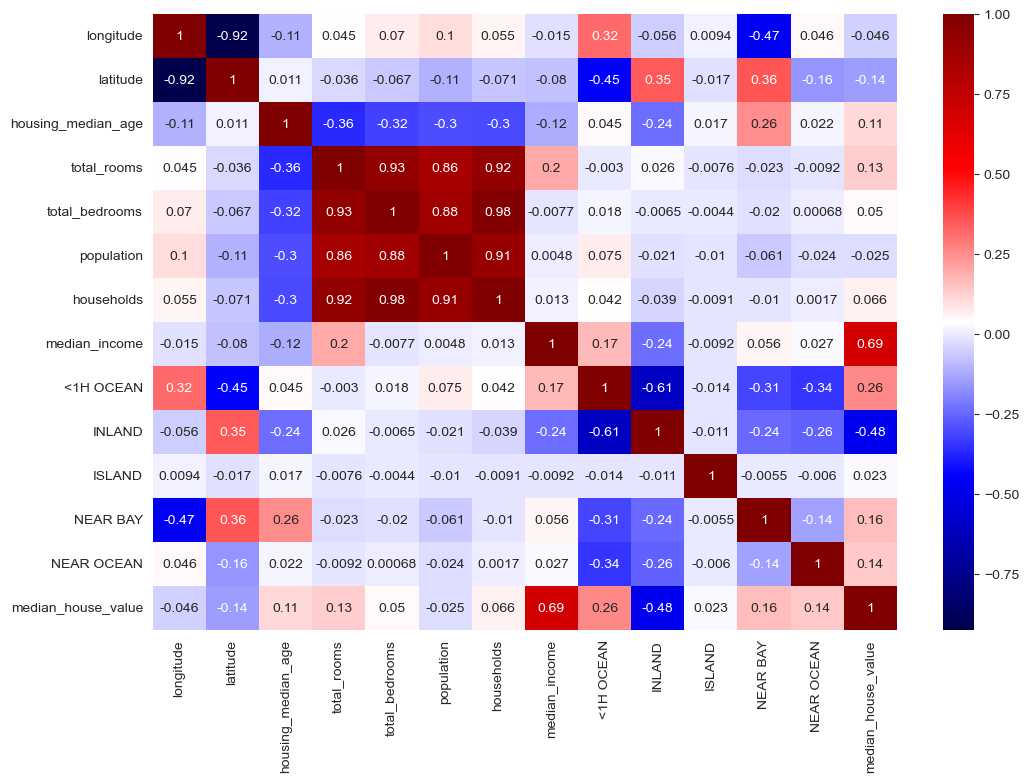

In [14]:
plt.figure(figsize = (12,8))
sns.heatmap(df2.corr(), annot = True, cmap = 'seismic')
plt.show()

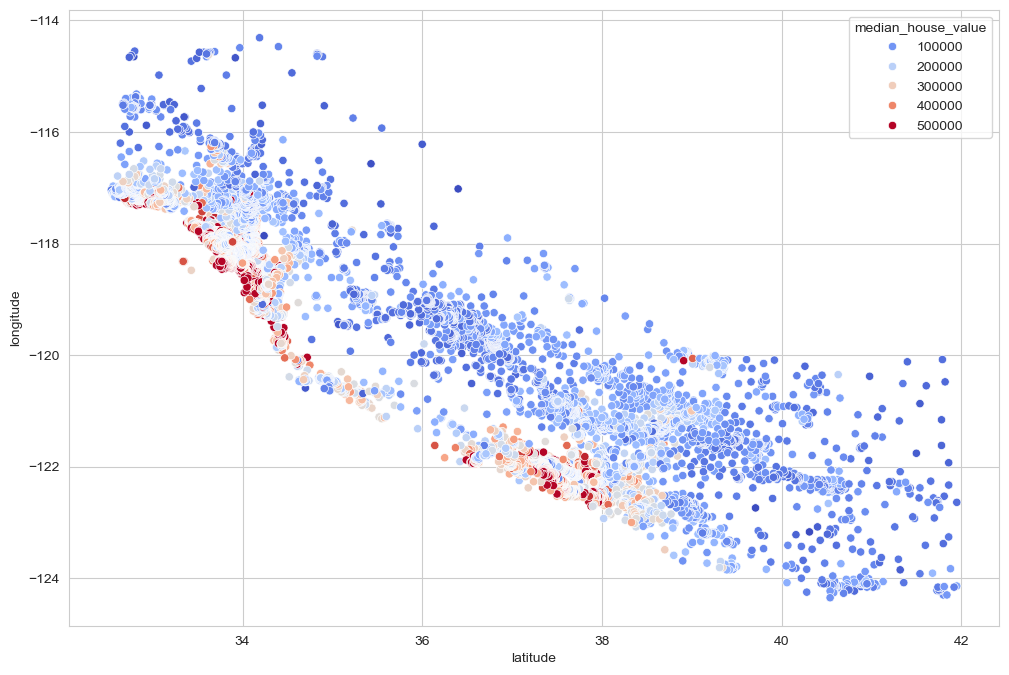

In [15]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df2, hue = 'median_house_value', palette='coolwarm')
plt.show()

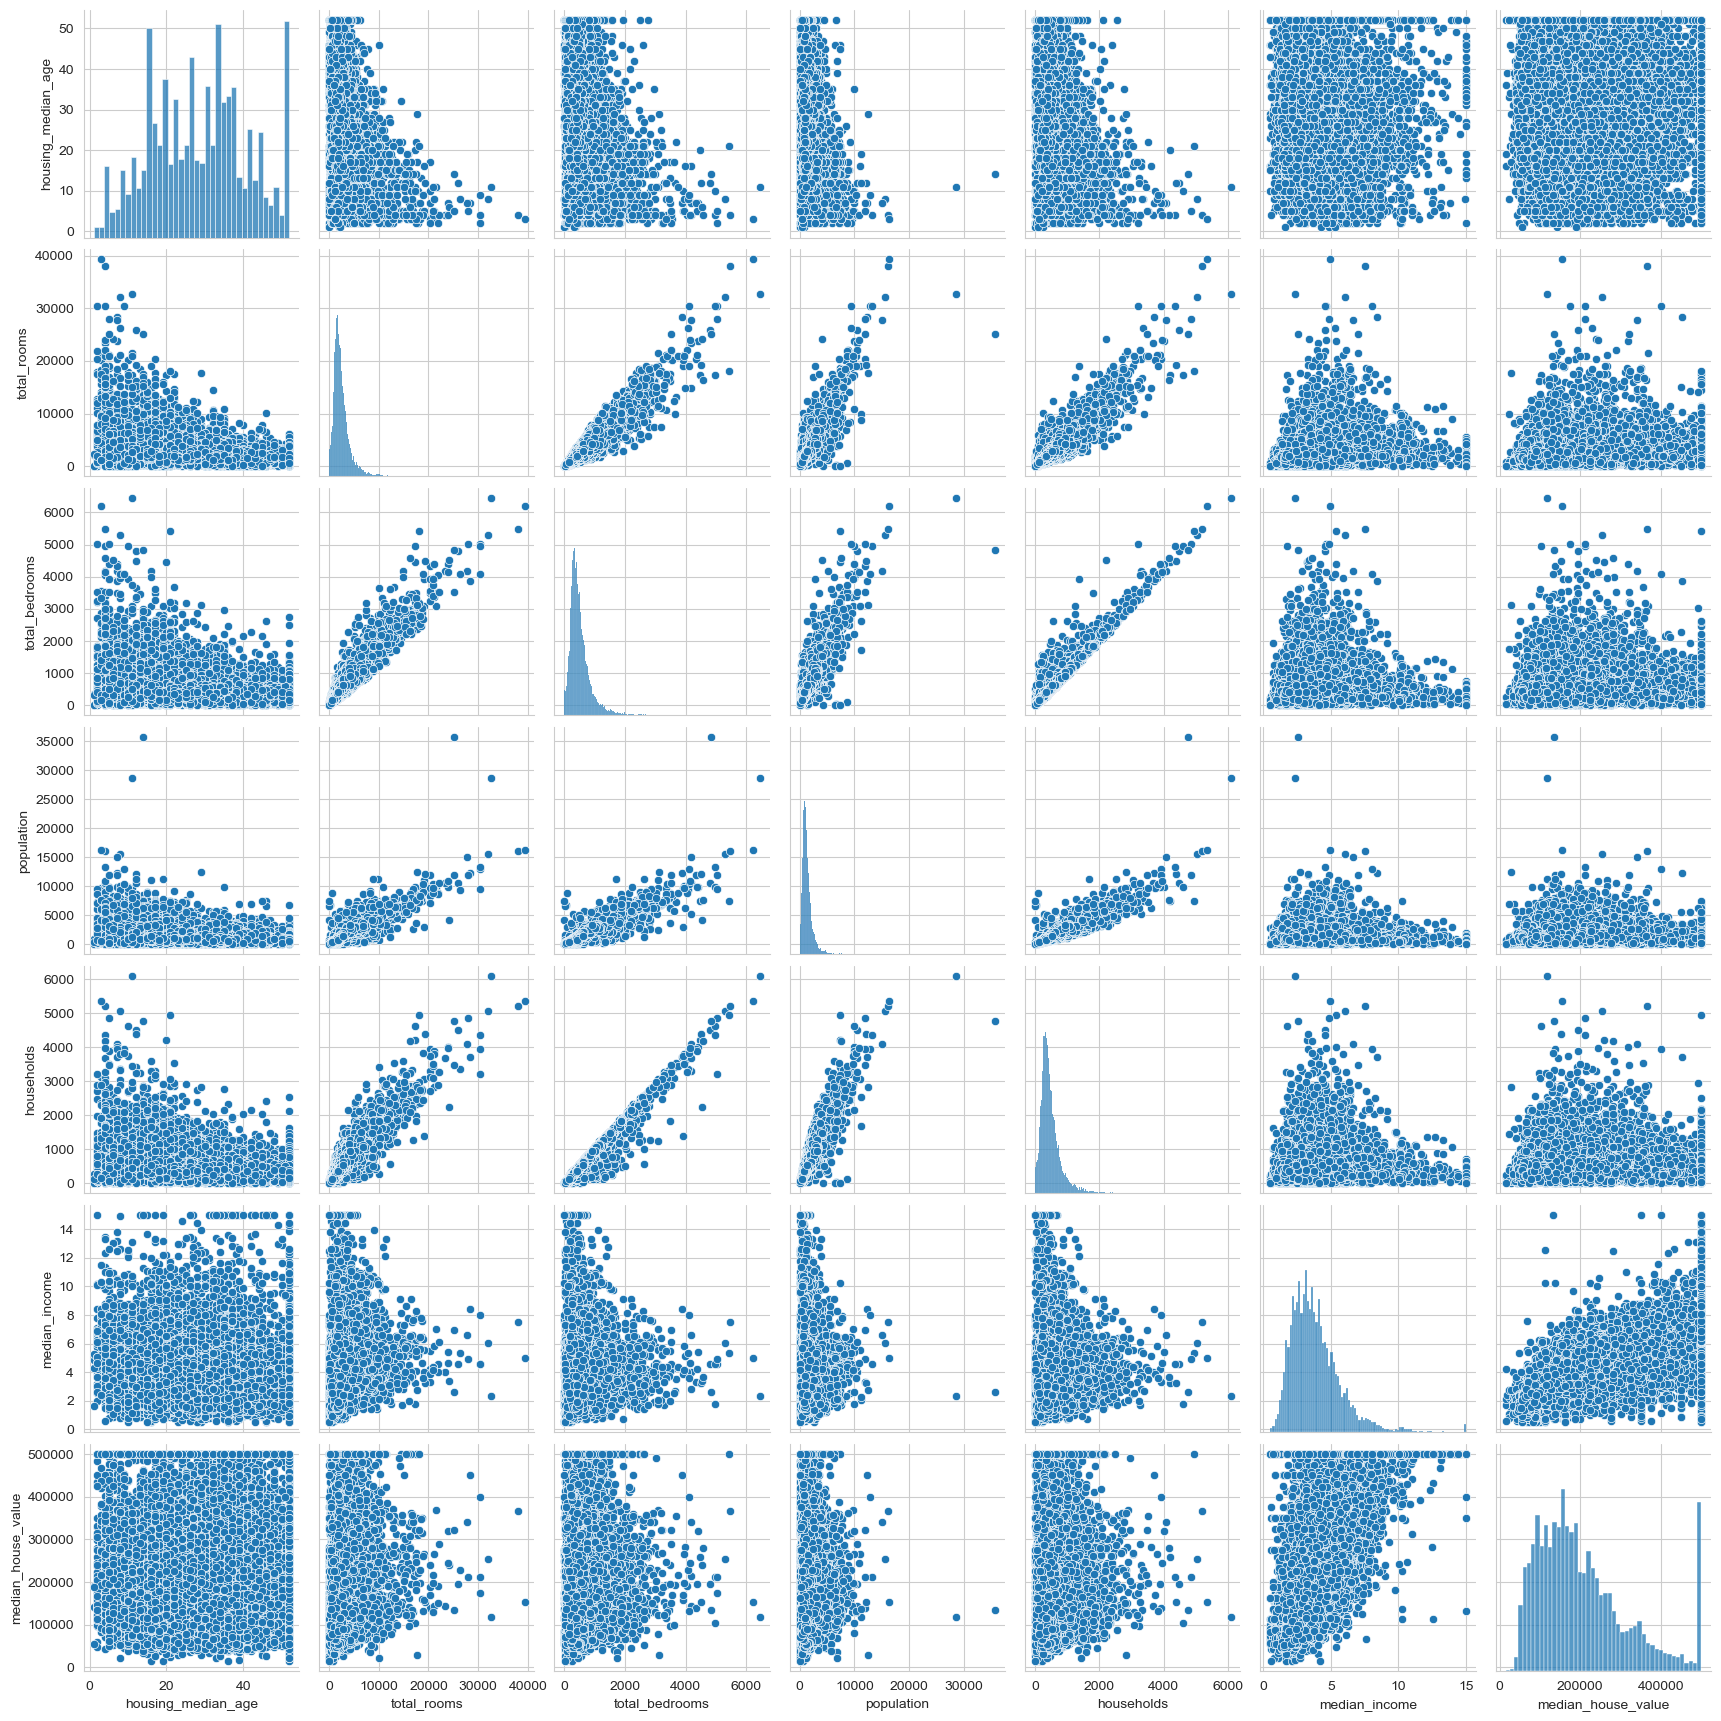

In [16]:
df3 = df2.dropna()
sns.pairplot(df3[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']])
plt.show()

In [17]:
X = df3.drop(['median_house_value'], axis = 1)
y = df3['median_house_value']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14303, 13), (6130, 13), (14303,), (6130,))

In [19]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred= reg.predict(X_test)

reg.score(X_test, y_test)

0.653875373567343

In [20]:

print(f'R2: {r2_score(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}')

R2: 0.653875373567343
RMSE: 67927.63804195379


In [21]:
modelos = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'BayesianRidge': BayesianRidge()
}

In [36]:
modelo_rmse = []
modelo_r2 = []
modelo_nomes = []

for nome, modelo in modelos.items():
    fit_modelo = modelo.fit(X_train, y_train)
    predicao = fit_modelo.predict(X_test)
    modelo_rmse.append(np.sqrt(mean_squared_error(y_test, predicao)))
    modelo_r2.append(r2_score(y_test, predicao))
    modelo_nomes.append(nome)

resultados_antes = pd.DataFrame({'Modelo': modelo_nomes, 'RMSE': modelo_rmse, 'R2': modelo_r2}).sort_values('RMSE')
resultados_antes
        

,Modelo,RMSE,R2
1,RandomForestRegressor,48850.631479,0.820989
4,Ridge,67911.286812,0.654042
0,LinearRegression,67927.638042,0.653875
5,BayesianRidge,67943.482974,0.653714
2,ElasticNet,70920.534110,0.622703
3,SVR,118070.498847,-0.045737


# Iniciando tratamento e condicionamento dos dados

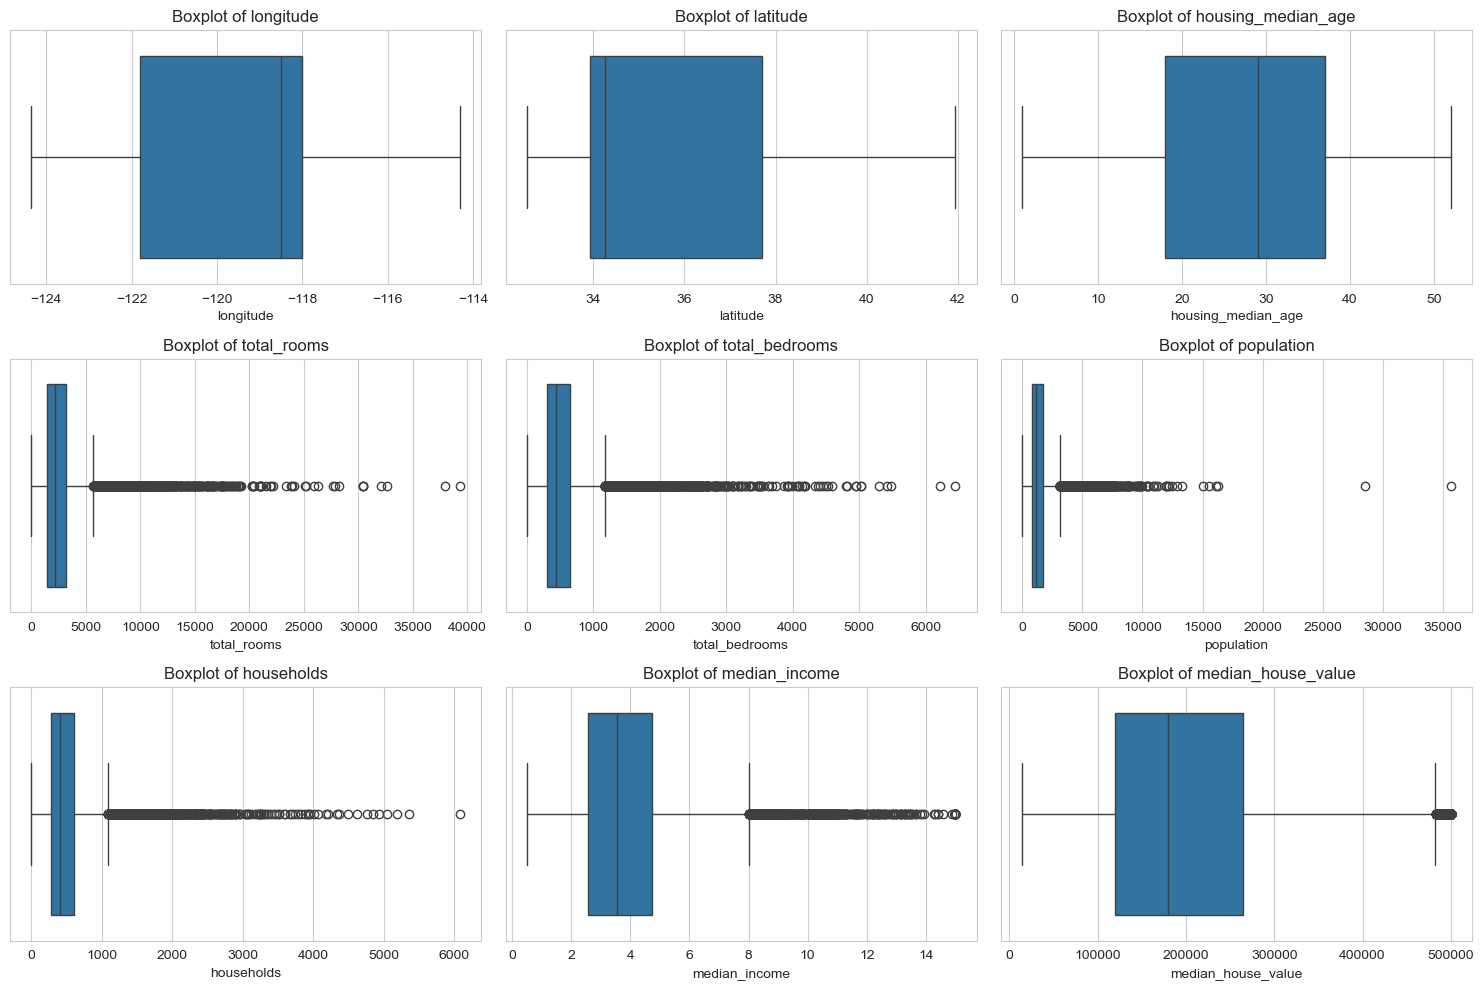

In [23]:
#verificando mais uma vez os outiliers

# Criando boxplots para as variáveis numéricas
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

plt.figure(figsize=(15, 10))

# Criar um boxplot para cada coluna
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [24]:
# transformar os dados em logaritmo

colunas_log  = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_house_value']

df3_log = df3.copy()
df3_log[colunas_log] = np.log1p(df3_log[colunas_log])


df3_log.head()




,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,False,False,False,True,False,13.022766
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,False,False,False,True,False,12.789687
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,False,False,False,True,False,12.771673
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,False,False,False,True,False,12.740520
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,False,False,False,True,False,12.743154


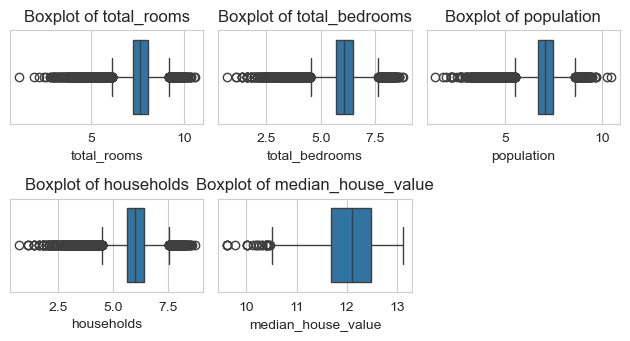

In [25]:
# Criando boxplots para as variáveis numéricas
for i, col in enumerate(colunas_log, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df3_log[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


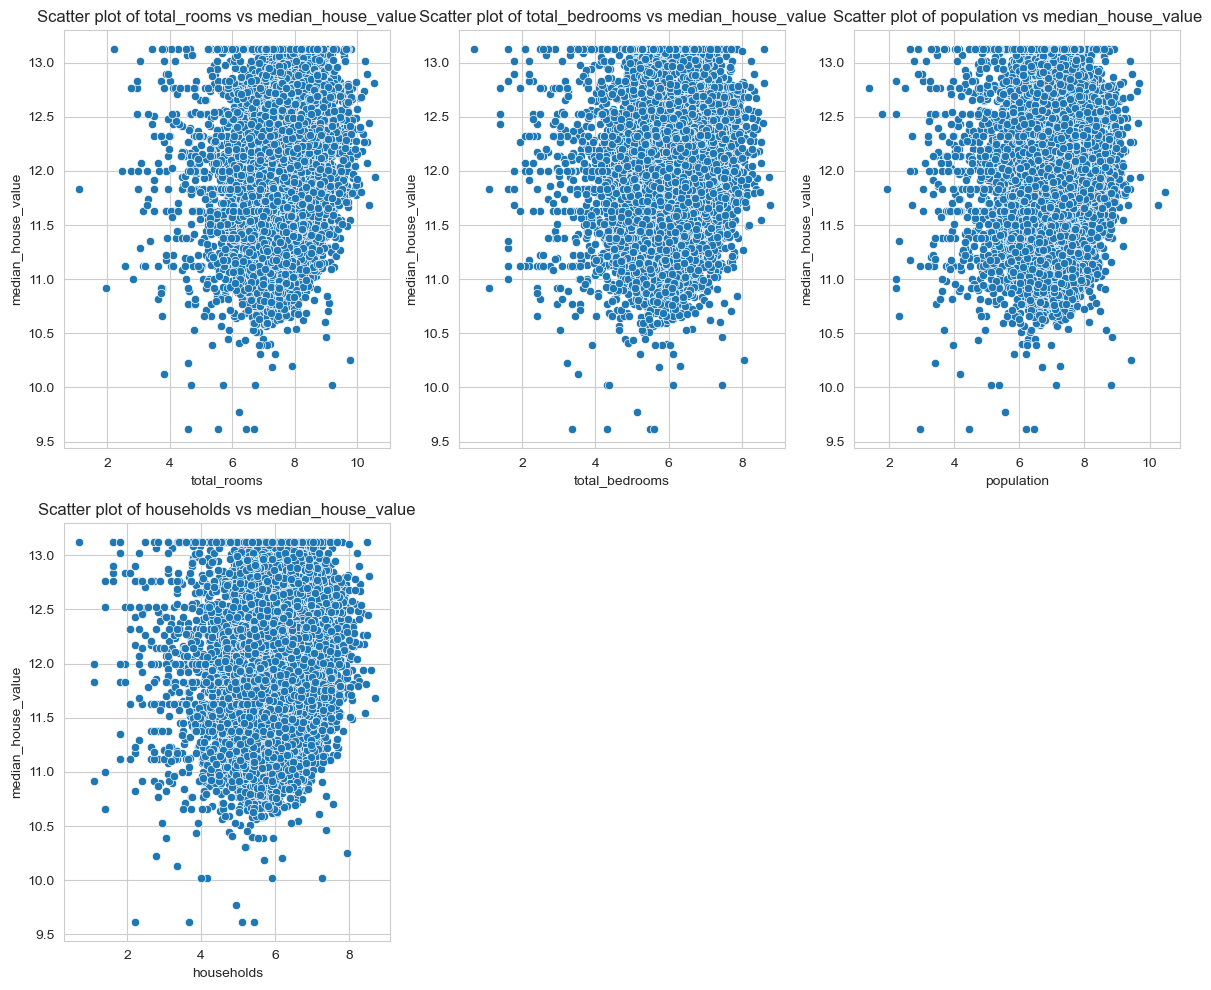

In [28]:
#criando os graficos de dispersao para verificar como ficaram após a transformação em log

# Criando gráficos de dispersão para as variáveis numéricas em relação ao 'median_house_value'
plt.figure(figsize=(12, 10))

# Plotando gráficos de dispersão para as colunas transformadas em log
for i, col in enumerate(colunas_log[:-1], 1):  # Excluindo 'median_house_value' da comparação
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df3_log[col], y=df3_log['median_house_value'])
    plt.title(f'Scatter plot of {col} vs median_house_value')

plt.tight_layout()
plt.show()

In [27]:
# Calculando a correlação de Pearson entre as variáveis preditoras e a variável alvo 'median_house_value'
correlation_matrix = df3_log[colunas_log].corr()

# Exibindo a correlação entre as variáveis e a variável alvo
correlation_with_target = correlation_matrix['median_house_value'].sort_values(ascending=False)
correlation_with_target


median_house_value    1.000000
total_rooms           0.185507
households            0.112815
total_bedrooms        0.087665
population            0.025702
Name: median_house_value, dtype: float64

In [31]:
df3_log

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,False,False,False,True,False,13.022766
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,False,False,False,True,False,12.789687
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,False,False,False,True,False,12.771673
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,False,False,False,True,False,12.740520
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,False,False,False,True,False,12.743154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,False,True,False,False,False,11.265758
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,False,True,False,False,False,11.252872
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,False,True,False,False,False,11.432810
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,False,True,False,False,False,11.346883


In [33]:
# Aplicando o StandardScaler nas colunas numéricas após a transformação logarítmica

scaler = StandardScaler()
df3_log_scaled = df3_log.copy()

# Aplicando o StandardScaler nas colunas numéricas
df3_log_scaled[colunas_log] = scaler.fit_transform(df3_log_scaled[colunas_log])

X_train_scaled_log, X_test_scaled_log, y_train_scaled_log, y_test_scaled_log = train_test_split(
    df3_log_scaled.drop('median_house_value', axis=1), 
    df3_log_scaled['median_house_value'], 
    test_size=0.3, 
    random_state=42
)

# Reaplicando a Regressão Linear nos dados escalonados e transformados
model_log_scaled = LinearRegression()
model_log_scaled.fit(X_train_scaled_log, y_train_scaled_log)

# Fazendo previsões no conjunto de teste
y_pred_log_scaled = model_log_scaled.predict(X_test_scaled_log)

# Calculando o RMSE e R² para os dados transformados e escalonados
rmse_log_scaled = mean_squared_error(y_test_scaled_log, y_pred_log_scaled, squared=False)
r2_log_scaled = r2_score(y_test_scaled_log, y_pred_log_scaled)

rmse_log_scaled, r2_log_scaled


c:\Users\alyss\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.5612304696421871, 0.6884912124287348)

In [37]:
#visualizando novos valores

modelo_rmse = []
modelo_r2 = []
modelo_nomes = []

for nome, modelo in modelos.items():
    fit_modelo = modelo.fit(X_train_scaled_log, y_train_scaled_log)
    predicao = fit_modelo.predict(X_test_scaled_log)
    modelo_rmse.append(np.sqrt(mean_squared_error(y_test_scaled_log, predicao)))
    modelo_r2.append(r2_score(y_test_scaled_log, predicao))
    modelo_nomes.append(nome)

resultados = pd.DataFrame({'Modelo': modelo_nomes, 'RMSE': modelo_rmse, 'R2': modelo_r2}).sort_values('RMSE')
resultados
        

                  Modelo      RMSE        R2
1  RandomForestRegressor  0.413204  0.831144
4                  Ridge  0.561186  0.688541
0       LinearRegression  0.561230  0.688491
5          BayesianRidge  0.561238  0.688482
3                    SVR  0.619276  0.620723
2             ElasticNet  0.809199  0.352413                   Modelo           RMSE        R2
1  RandomForestRegressor   48850.631479  0.820989
4                  Ridge   67911.286812  0.654042
0       LinearRegression   67927.638042  0.653875
5          BayesianRidge   67943.482974  0.653714
2             ElasticNet   70920.534110  0.622703
3                    SVR  118070.498847 -0.045737


In [38]:
print(resultados_antes)
print(resultados)

                  Modelo           RMSE        R2
1  RandomForestRegressor   48850.631479  0.820989
4                  Ridge   67911.286812  0.654042
0       LinearRegression   67927.638042  0.653875
5          BayesianRidge   67943.482974  0.653714
2             ElasticNet   70920.534110  0.622703
3                    SVR  118070.498847 -0.045737
                  Modelo      RMSE        R2
1  RandomForestRegressor  0.413204  0.831144
4                  Ridge  0.561186  0.688541
0       LinearRegression  0.561230  0.688491
5          BayesianRidge  0.561238  0.688482
3                    SVR  0.619276  0.620723
2             ElasticNet  0.809199  0.352413
